# Modelo de Machine Learning

## Importación de librerías

In [11]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import mlflow
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

#Modelos
from sklearn.linear_model import Ridge
import xgboost
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)

## Carga de datasets

In [2]:
X_train = pd.read_csv("../../data/final/X_train_final.csv", sep =";")
X_train.head()

,tempMedia,tempMax,tempMin,humedadMedia,humedadMax,humedadMin,velViento,dirViento,velVientoMax,dirVientoVelMax,...,precipitacion,altitud,lon,lat,dia_del_año_sin,dia_del_año_cos,año,mes,mes_sin,mes_cos
0,-1.149191,-0.644914,-1.635524,0.189294,0.081925,0.030319,-0.423513,-1.502747,-0.453085,1.508065,...,-0.249695,-0.821274,-0.961184,-1.212781,0.025922,1.417772,-1.705504,-1.607476,0.717969,1.22936
1,-1.156422,-1.448554,-0.807960,1.172613,0.417881,2.123171,-0.296844,-1.517465,-0.838102,1.459742,...,-0.249695,-0.821274,-0.961184,-1.212781,0.050257,1.417144,-1.705504,-1.607476,0.717969,1.22936
2,-1.277910,-0.979660,-1.227846,0.940778,0.498219,0.747554,-0.095188,-1.334265,-0.382228,1.299015,...,-0.211286,-0.821274,-0.961184,-1.212781,0.074578,1.416096,-1.705504,-1.607476,0.717969,1.22936
3,-0.935141,-0.685034,-1.161667,0.263933,0.081925,0.160125,0.169296,-0.948927,0.687454,-0.818792,...,-0.249695,-0.821274,-0.961184,-1.212781,0.098877,1.414630,-1.705504,-1.607476,0.717969,1.22936
4,-1.040719,-0.745213,-1.291134,0.206823,0.103835,0.218978,-0.504581,-1.054936,-0.666509,-0.513097,...,-0.249695,-0.821274,-0.961184,-1.212781,0.123147,1.412746,-1.705504,-1.607476,0.717969,1.22936


In [3]:
X_test = pd.read_csv("../../data/final/X_test_final.csv", sep =";")
X_test.head()

,tempMedia,tempMax,tempMin,humedadMedia,humedadMax,humedadMin,velViento,dirViento,velVientoMax,dirVientoVelMax,...,precipitacion,altitud,lon,lat,dia_del_año_sin,dia_del_año_cos,año,mes,mes_sin,mes_cos
0,-1.198364,-1.299361,-1.231380,0.618471,0.366758,0.742604,0.614156,1.050836,0.199566,1.103622,...,0.326445,-0.821274,-0.961184,-1.212781,0.025922,1.417772,1.792456,-1.607476,0.717969,1.22936
1,-1.810143,-1.518763,-1.920642,0.748525,0.279117,0.438989,-0.756905,1.551034,-1.005427,1.573196,...,-0.211286,-0.821274,-0.961184,-1.212781,0.050257,1.417144,1.792456,-1.607476,0.717969,1.22936
2,-1.897498,-1.451062,-2.146487,0.403600,0.023498,-0.194642,-0.859253,-0.823363,-0.992622,1.134087,...,-0.211286,-0.821274,-0.961184,-1.212781,0.074578,1.416096,1.792456,-1.607476,0.717969,1.22936
3,-1.717725,-1.400913,-1.984412,0.488417,0.030801,0.372986,-0.668743,-0.946869,-0.599494,1.307419,...,-0.211286,-0.821274,-0.961184,-1.212781,0.098877,1.414630,1.792456,-1.607476,0.717969,1.22936
4,-1.345885,-1.333211,-1.307037,0.505381,-0.005716,0.694201,-0.519781,-1.363186,-0.863287,-1.868241,...,-0.249695,-0.821274,-0.961184,-1.212781,0.123147,1.412746,1.792456,-1.607476,0.717969,1.22936


In [4]:
y_test = pd.read_csv("../../data/final/y_test_final.csv", sep =";")
y_test.head()

,et0
0,1.410210
1,0.914485
2,0.952486
3,1.015420
4,1.062508


In [5]:
y_train = pd.read_csv("../../data/final/y_train_final.csv", sep =";")
y_train.head()

,et0
0,1.495588
1,0.776324
2,1.327342
3,1.796508
4,1.371563


## Modelos

Comenzamos definiendo un modelo base

In [ ]:
script_dir = os.path.dirname(__file__)
project_root = os.path.abspath(os.path.join(script_dir, '..', '..'))
mlruns_path = os.path.join(project_root, "mlruns")
tracking_uri = "file://" + mlruns_path 
mlflow.set_tracking_uri(tracking_uri)

In [18]:
mlflow.set_experiment("TFM_Riego_Pred_ET0")


2025/10/23 19:05:59 INFO mlflow.tracking.fluent: Experiment with name 'TFM_Riego_Pred_ET0' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/lola/Escritorio/TFM-Sistema-Riego-Agricola/mlruns/749096422678353308', creation_time=1761239159867, experiment_id='749096422678353308', last_update_time=1761239159867, lifecycle_stage='active', name='TFM_Riego_Pred_ET0', tags={}>

In [19]:
with mlflow.start_run(run_name="Baseline_Ridge"):
    ridge_model = Ridge(random_state=42)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        ridge_model.fit(X_train_fold, y_train_fold)
        predictions = ridge_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))
        r2_scores.append(r2_score(y_val_fold, predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(ridge_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.sklearn.log_model(sk_model=ridge_model, name="ridge_cv_model", input_example=X_train, registered_model_name="baseline-ridge")
    
    print(f"RMSE CV Medio (Ridge): {round(np.mean(rmse_scores),4)} | R² CV Medio (Ridge): {round(np.mean(r2_scores),4)}")

    mlflow.end_run()

Fold 1 -> RMSE: 0.4933, R²: 0.9506
Fold 2 -> RMSE: 0.4415, R²: 0.9604
Fold 3 -> RMSE: 0.4397, R²: 0.9605
Fold 4 -> RMSE: 0.4201, R²: 0.9614
Fold 5 -> RMSE: 0.3563, R²: 0.9685
RMSE CV Medio (Ridge): 0.4302 | R² CV Medio (Ridge): 0.9603


Registered model 'baseline-ridge' already exists. Creating a new version of this model...
Created version '3' of model 'baseline-ridge'.


In [20]:
with mlflow.start_run(run_name="XGBoost_default_param"):
    xgb_model = xgboost.XGBRegressor(random_state=42)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        xgb_model.fit(X_train_fold, y_train_fold)
        predictions = xgb_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))
        r2_scores.append(r2_score(y_val_fold, predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(xgb_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.xgboost.log_model(xgb_model=xgb_model, name = "xgboost_cv_model", input_example=X_train, registered_model_name="xgboost")
    
    print(f"RMSE CV Medio (XGBoost): {round(np.mean(rmse_scores),4)} | R² CV Medio (XGBoost): {round(np.mean(r2_scores),4)}")
    
    mlflow.end_run()

Fold 1 -> RMSE: 0.1946, R²: 0.9923
Fold 2 -> RMSE: 0.1169, R²: 0.9972
Fold 3 -> RMSE: 0.1123, R²: 0.9974
Fold 4 -> RMSE: 0.1213, R²: 0.9968
Fold 5 -> RMSE: 0.1213, R²: 0.9964


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [19:06:34] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [19:06:39] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)


RMSE CV Medio (XGBoost): 0.1333 | R² CV Medio (XGBoost): 0.996


Registered model 'xgboost' already exists. Creating a new version of this model...
Created version '2' of model 'xgboost'.


In [21]:
with mlflow.start_run(run_name="SVR_default_param"):
    svr_model = SVR()
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        svr_model.fit(X_train_fold, y_train_fold['et0'])
        predictions = svr_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold['et0'], predictions)))
        r2_scores.append(r2_score(y_val_fold['et0'], predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(svr_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.sklearn.log_model(sk_model=svr_model, name="svr_cv_model", input_example=X_train, registered_model_name="SVR")
    
    print(f"RMSE CV Medio (SVR): {round(np.mean(rmse_scores),4)} | R² CV Medio (SVR): {round(np.mean(r2_scores),4)}")
    mlflow.end_run()

Fold 1 -> RMSE: 0.1472, R²: 0.9956
Fold 2 -> RMSE: 0.0858, R²: 0.9985
Fold 3 -> RMSE: 0.0622, R²: 0.9992
Fold 4 -> RMSE: 0.0774, R²: 0.9987
Fold 5 -> RMSE: 0.0688, R²: 0.9988
RMSE CV Medio (SVR): 0.0883 | R² CV Medio (SVR): 0.9982


Successfully registered model 'SVR'.
Created version '1' of model 'SVR'.


In [22]:
with mlflow.start_run(run_name="RandomFores_default_param"):
    rf_model =  RandomForestRegressor(random_state=42)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        print(type(y_train))
        rf_model.fit(X_train_fold, y_train_fold['et0'])
        predictions = rf_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold['et0'], predictions)))
        r2_scores.append(r2_score(y_val_fold['et0'], predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(rf_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.sklearn.log_model(sk_model=rf_model, name="rf_cv_model", input_example=X_train, registered_model_name="RandomForest")
    
    print(f"RMSE CV Medio (Random Forest): {round(np.mean(rmse_scores),4)} | R² CV Medio (Random Forest): {round(np.mean(r2_scores),4)}")
    mlflow.end_run()

<class 'pandas.core.frame.DataFrame'>
Fold 1 -> RMSE: 0.2486, R²: 0.9875
<class 'pandas.core.frame.DataFrame'>
Fold 2 -> RMSE: 0.0942, R²: 0.9982
<class 'pandas.core.frame.DataFrame'>
Fold 3 -> RMSE: 0.0923, R²: 0.9983
<class 'pandas.core.frame.DataFrame'>
Fold 4 -> RMSE: 0.0924, R²: 0.9981
<class 'pandas.core.frame.DataFrame'>
Fold 5 -> RMSE: 0.0981, R²: 0.9976
RMSE CV Medio (Random Forest): 0.1251 | R² CV Medio (Random Forest): 0.9959


Successfully registered model 'RandomForest'.
Created version '1' of model 'RandomForest'.


In [23]:
with mlflow.start_run(run_name="XGBoost_RandomSearch_Tuning"):
    params_xgboost = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    }
    
    tscv = TimeSeriesSplit(n_splits=5)
    xgboost_estimator = xgboost.XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=-1)
    random_search = RandomizedSearchCV(
            estimator=xgboost_estimator,
            param_distributions=params_xgboost,
            n_iter=25, 
            cv=tscv,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
    
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_score = -random_search.best_score_
    best_params = random_search.best_params_
    print(f'Mejor modelo: {best_model}')
    print(f'Parámetros: {best_params}')
    print(f'RMSE: {best_score:.4f}')
    

    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits_cv", tscv.n_splits)
    mlflow.log_param("n_iter_random_search", random_search.n_iter)
    mlflow.log_param("scoring_metric", random_search.scoring)
    mlflow.log_metric("best_rmse_cv_xgboost", best_score)
    mlflow.xgboost.log_model(xgb_model=best_model, name="xgboost_tunning", input_example=X_train, registered_model_name="xgboost-tunning")

    mlflow.end_run()

Fitting 5 folds for each of 25 candidates, totalling 125 fits


Mejor modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)
Parámetros: {'subsample': 0.8, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
RMSE: 0.0703


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [22:04:40] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [22:04:46] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
Successfully registered model 'xgboost-tunning'.
Created version '1' of model 'xgboost-tunning'.


In [25]:
with mlflow.start_run(run_name="Best XGGBoost - Final_Evaluation"): 

    best_model.fit(X_train, y_train) 


    predictions_final_test = best_model.predict(X_test)


    rmse_final_test = np.sqrt(mean_squared_error(y_test, predictions_final_test))
    r2_final_test = r2_score(y_test, predictions_final_test)

    print(f"RMSE Final en Test Set (XGBoost best param): {rmse_final_test:.4f}")
    print(f"R² Final en Test Set (XGBoost best param):   {r2_final_test:.4f}")


    mlflow.log_params(best_params)
    mlflow.log_metric("rmse_final_test", rmse_final_test) 
    mlflow.log_metric("r2_final_test", r2_final_test) 

    
    mlflow.xgboost.log_model(xgb_model=best_model, name="final_production_model", input_example = X_train, registered_model_name="xgboost-best-model-val")

    mlflow.end_run()

RMSE Final en Test Set (XGBoost best param): 0.0715
R² Final en Test Set (XGBoost best param):   0.9989


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [22:42:19] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [22:42:24] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
Successfully registered model 'xgboost-best-model-val'.
Created version '1' of model 'xgboost-best-model-val'.


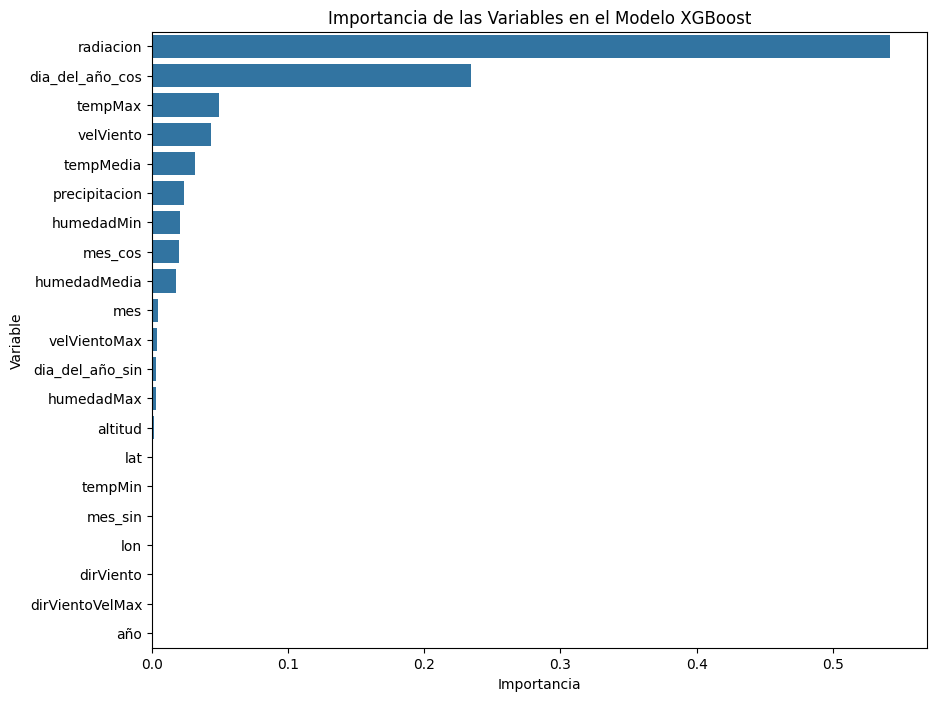

In [26]:
importancias = best_model.feature_importances_
df_importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})
df_importancias = df_importancias.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_importancias) # Muestra las 15 primeras
plt.title('Importancia de las Variables en el Modelo XGBoost')
plt.show()

Dataset reducido

In [6]:
X_prueba = X_train.copy()

In [7]:
X_prueba.columns

Index(['tempMedia', 'tempMax', 'tempMin', 'humedadMedia', 'humedadMax',
       'humedadMin', 'velViento', 'dirViento', 'velVientoMax',
       'dirVientoVelMax', 'radiacion', 'precipitacion', 'altitud', 'lon',
       'lat', 'dia_del_año_sin', 'dia_del_año_cos', 'año', 'mes', 'mes_sin',
       'mes_cos'],
      dtype='object')

In [1]:
X_prueba = X_prueba[['tempMax', 'tempMin', 'humedadMax','humedadMin', 'velViento', 'altitud', 'lon',
                     'lat', 'dia_del_año_sin', 'dia_del_año_cos', 'año', 'mes', 'mes_sin', 'mes_cos']]

NameError: name 'X_prueba' is not defined

In [30]:
with mlflow.start_run(run_name="Baseline_Ridge - Reducido"):
    ridge_model = Ridge(random_state=42)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_prueba.iloc[train_index], X_prueba.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        ridge_model.fit(X_train_fold, y_train_fold)
        predictions = ridge_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))
        r2_scores.append(r2_score(y_val_fold, predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(ridge_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.sklearn.log_model(sk_model=ridge_model, name="ridge_cv_model-df-reducido", input_example=X_prueba, registered_model_name="baseline-ridge-reducido")
    
    print(f"RMSE CV Medio (Ridge): {round(np.mean(rmse_scores),4)} | R² CV Medio (Ridge): {round(np.mean(r2_scores),4)}")

    mlflow.end_run()

Fold 1 -> RMSE: 0.6101, R²: 0.9245
Fold 2 -> RMSE: 0.5232, R²: 0.9444
Fold 3 -> RMSE: 0.5279, R²: 0.9430
Fold 4 -> RMSE: 0.5254, R²: 0.9396
Fold 5 -> RMSE: 0.4590, R²: 0.9478
RMSE CV Medio (Ridge): 0.5291 | R² CV Medio (Ridge): 0.9399


Successfully registered model 'baseline-ridge-reducido'.
Created version '1' of model 'baseline-ridge-reducido'.


In [9]:
with mlflow.start_run(run_name="XGBoost_default_param_dataset_reducio"):
    xgb_model = xgboost.XGBRegressor(random_state=42)
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    rmse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
        X_train_fold, X_val_fold = X_prueba.iloc[train_index], X_prueba.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        xgb_model.fit(X_train_fold, y_train_fold)
        predictions = xgb_model.predict(X_val_fold)
        
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, predictions)))
        r2_scores.append(r2_score(y_val_fold, predictions))
        
        print(f"Fold {fold+1} -> RMSE: {rmse_scores[-1]:.4f}, R²: {r2_scores[-1]:.4f}")

    mlflow.log_params(xgb_model.get_params())
    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits", tscv.n_splits)
    mlflow.log_metric("rmse_cv_mean", np.mean(rmse_scores))
    mlflow.log_metric("rmse_cv_std", np.std(rmse_scores))
    mlflow.log_metric("r2_cv_mean", np.mean(r2_scores))
    mlflow.log_metric("r2_cv_std", np.std(r2_scores))
    mlflow.xgboost.log_model(xgb_model=xgb_model, name="xgboost_cv_model-df-reducido", input_example=X_prueba, registered_model_name="xgboost-reducido")
    
    print(f"RMSE CV Medio (XGBoost): {round(np.mean(rmse_scores),4)} | R² CV Medio (XGBoost): {round(np.mean(r2_scores),4)}")
    
    mlflow.end_run()

Fold 1 -> RMSE: 0.2750, R²: 0.9847
Fold 2 -> RMSE: 0.2708, R²: 0.9851
Fold 3 -> RMSE: 0.2948, R²: 0.9822
Fold 4 -> RMSE: 0.3453, R²: 0.9739
Fold 5 -> RMSE: 0.3021, R²: 0.9774


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [16:53:07] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [16:53:11] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)


RMSE CV Medio (XGBoost): 0.2976 | R² CV Medio (XGBoost): 0.9807


Successfully registered model 'xgboost-reducido'.
Created version '1' of model 'xgboost-reducido'.


In [10]:
with mlflow.start_run(run_name="XGBoost_RandomSearch_Tuning_dataset_reducido"):
    params_xgboost = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    }
    
    tscv = TimeSeriesSplit(n_splits=5)
    xgboost_estimator = xgboost.XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=-1)
    random_search = RandomizedSearchCV(
            estimator=xgboost_estimator,
            param_distributions=params_xgboost,
            n_iter=25, 
            cv=tscv,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
    
    random_search.fit(X_prueba, y_train)
    best_model = random_search.best_estimator_
    best_score = -random_search.best_score_
    best_params = random_search.best_params_
    print(f'Mejor modelo: {best_model}')
    print(f'Parámetros: {best_params}')
    print(f'RMSE: {best_score:.4f}')
    

    mlflow.log_param("cv_method", "TimeSeriesSplit")
    mlflow.log_param("n_splits_cv", tscv.n_splits)
    mlflow.log_param("n_iter_random_search", random_search.n_iter)
    mlflow.log_param("scoring_metric", random_search.scoring)
    mlflow.log_metric("best_rmse_cv_xgboost", best_score)
    mlflow.xgboost.log_model(xgb_model=best_model, name="xgboost_tunning-df-reducido", input_example=X_prueba, registered_model_name="xgboost-tunning-reducido")

    mlflow.end_run()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mejor modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)
Parámetros: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
RMSE: 0.2750


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [16:55:05] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [16:55:09] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
Successfully registered model 'xgboost-tunning-reducido'.
Created version '1' of model 'xgboost-tunning-reducido'.


In [17]:
with mlflow.start_run(run_name="Best XGGBoost - Final_Evaluation - dataset reducido"): 

    best_model.fit(X_prueba, y_train) 

    x_test_prueba = X_test[['tempMax', 'tempMin', 'humedadMax',
       'humedadMin', 'velViento', 'altitud', 'lon',
       'lat', 'dia_del_año_sin', 'dia_del_año_cos', 'año', 'mes', 'mes_sin',
       'mes_cos']]
    predictions_final_test = best_model.predict(x_test_prueba)


    rmse_final_test = np.sqrt(mean_squared_error(y_test, predictions_final_test))
    r2_final_test = r2_score(y_test, predictions_final_test)

    print(f"RMSE Final en Test Set (XGBoost best param): {rmse_final_test:.4f}")
    print(f"R² Final en Test Set (XGBoost best param):   {r2_final_test:.4f}")

    dump(best_model, 'XGBoost_modelo_final.joblib')
    mlflow.log_params(best_params)
    mlflow.log_metric("rmse_final_test", rmse_final_test) 
    mlflow.log_metric("r2_final_test", r2_final_test) 

    
    mlflow.xgboost.log_model(xgb_model=best_model, name="final_production_model-df-reducido", input_example=X_prueba, registered_model_name="xgboost-best-model-val-reducido")

    mlflow.end_run()

RMSE Final en Test Set (XGBoost best param): 0.2791
R² Final en Test Set (XGBoost best param):   0.9833


/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1115: UserWarning: [22:58:43] WARNING: /workspace/src/c_api/c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
/home/lola/Escritorio/TFM-Sistema-Riego-Agricola/.env/lib/python3.11/site-packages/xgboost/sklearn.py:1124: UserWarning: [22:58:47] WARNING: /workspace/src/c_api/c_api.cc:1511: Unknown file format: `xgb`. Using UBJSON (`ubj`) as a guess.
  self.get_booster().load_model(fname)
Registered model 'xgboost-best-model-val-reducido' already exists. Creating a new version of this model...
Created version '2' of model 'xgboost-best-model-val-reducido'.


In [13]:
importancias = best_model.feature_importances_
df_importancias = pd.DataFrame({
    'Variable': X_prueba.columns,
    'Importancia': importancias
})

In [14]:
df_importancias = df_importancias.sort_values('Importancia', ascending=False)
df_importancias

,Variable,Importancia
9,dia_del_año_cos,0.506147
13,mes_cos,0.250238
0,tempMax,0.090614
11,mes,0.047661
3,humedadMin,0.028509
4,velViento,0.025691
12,mes_sin,0.020594
8,dia_del_año_sin,0.008170
2,humedadMax,0.008137
1,tempMin,0.007270


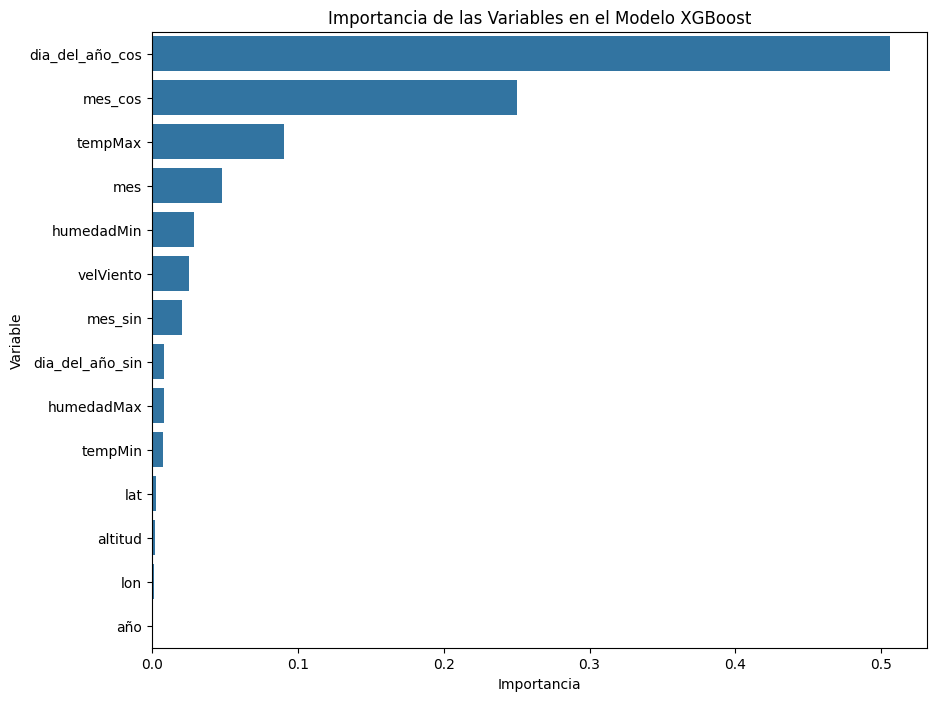

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_importancias)
plt.title('Importancia de las Variables en el Modelo XGBoost')
plt.show()

['XGBoost_modelo_final.joblib']